<a href="https://colab.research.google.com/github/MANOJHRMANOJHR/ai_assignments/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baseline k-NN Accuracy (original 64 dims): 0.9833333333333333
PCA k-NN Accuracy: 0.6111111111111112
Kernel PCA (RBF) k-NN Accuracy: 0.32222222222222224
LLE k-NN Accuracy: 0.8916666666666667


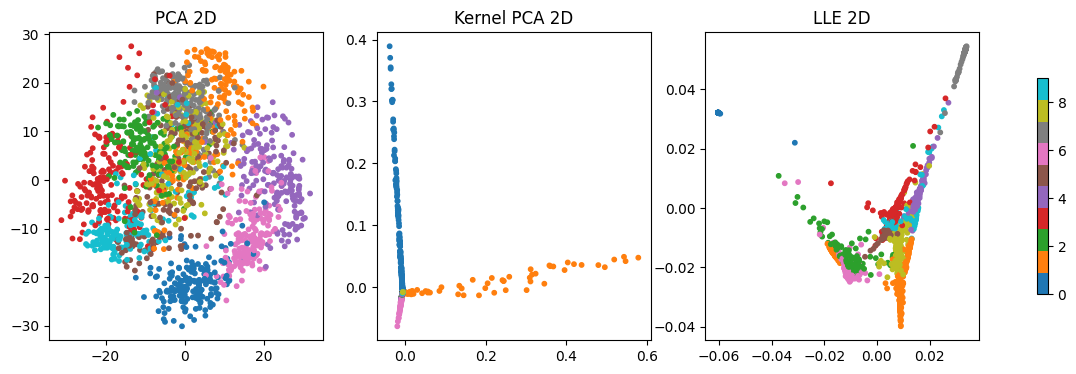

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Baseline kNN accuracy without dimensionality reduction
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, knn.predict(X_test))
print("Baseline k-NN Accuracy (original 64 dims):", baseline_acc)

# ---------- PCA ----------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ---------- Kernel PCA ----------
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.01)
X_kpca = kpca.fit_transform(X)

# ---------- LLE ----------
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_lle = lle.fit_transform(X)

# ---------- Evaluate kNN after Dimensionality Reduction ----------
def eval_reduced_data(X_reduced, name):
    X_train_r, X_test_r, _, _ = train_test_split(
        X_reduced, y, test_size=0.2, random_state=42
    )
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_r, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_r))
    print(f"{name} k-NN Accuracy:", acc)

eval_reduced_data(X_pca, "PCA")
eval_reduced_data(X_kpca, "Kernel PCA (RBF)")
eval_reduced_data(X_lle, "LLE")

# ---------- Plotting ----------
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
titles = ["PCA 2D", "Kernel PCA 2D", "LLE 2D"]
datasets = [X_pca, X_kpca, X_lle]

for ax, data, title in zip(axes, datasets, titles):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=y, cmap="tab10", s=10)
    ax.set_title(title)

plt.colorbar(scatter, ax=axes, shrink=0.7)
plt.show()
